**Customer Segmentation Analysis Using Clustering Method** <br>
*Steps to solve this problem :*
1. Importing Libraries.
2. Exploration of data.
3. Write K-Means Algorithm Functions.
4. Choose the features to use in the K-Means Algorithm & Plot the Result.
6. 3D Plot of Every Features.

**Importing Libraries**

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

**Data Exploration**

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Write K-Means Algorithm Functions**

In [4]:
def find_closest_centroid(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        curr = 10000000
        index = 0
        for j in range(K):
            a = np.linalg.norm(X[i] - centroids[j])
            if a < curr:
                curr = a
                index = j
        idx[i] = index
    return idx

In [5]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for i in range(K):
        a = [X[j] for j in range(m) if idx[j] == i]
        centroids[i] = np.mean(a, axis = 0)
    
    return centroids

In [6]:
def cost_function(X, centroids, idx):
    m = X.shape[0] 
    K = centroids.shape[0]
    J = 0
    for k in range(K):
        distances = np.linalg.norm(X[idx == k] - centroids[k], axis=1)
        J += np.sum(distances ** 2)
    J /= m
    return J

In [7]:
def run_kMeans(X, initial_centroids, max_iters=10):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids  
    idx = np.zeros(m)
    for i in range(max_iters):
        idx = find_closest_centroid(X, centroids)
        centroids = compute_centroids(X, idx, K)
        J = cost_function(X, centroids, idx)
        print(f"K-Means iteration {i}/{max_iters - 1}, J = {J}")
    return centroids, idx

In [8]:
def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

In [9]:
def kmeans(X, K, max_iters):
    max_iters = 10
    initial_centroids = kMeans_init_centroids(X, K)
    centroids, idx = run_kMeans(X, initial_centroids, max_iters)
    return centroids, idx

In [10]:
def plot(X, idx, feature1, feature2):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(X[:, 0], X[:, 1], c=idx, alpha=0.8)
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_title('K-Means Clustering')
    plt.show()

In [45]:
def plot3d(X, idx, f1, f2, f3):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=idx)
    ax.set_xlabel(f1)
    ax.set_ylabel(f2)
    ax.set_zlabel(f3)
    plt.show()

**Choose the features to use in the K-Means Algorithm & Plot the Result**

K-Means iteration 0/9, J = 291.5014885472901
K-Means iteration 1/9, J = 280.83539621995266
K-Means iteration 2/9, J = 260.8302682320329
K-Means iteration 3/9, J = 239.76550294476766
K-Means iteration 4/9, J = 208.9118913398693
K-Means iteration 5/9, J = 201.3995815602837
K-Means iteration 6/9, J = 201.0708190532081
K-Means iteration 7/9, J = 200.1620497726627
K-Means iteration 8/9, J = 199.79862046332698
K-Means iteration 9/9, J = 199.79862046332698


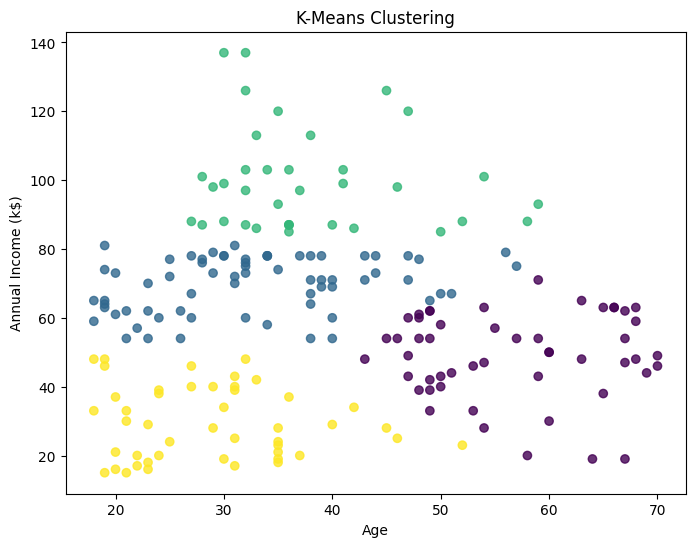

In [28]:
X1 = df[['Age', 'Annual Income (k$)']].to_numpy()
centroids1, idx1 = kmeans(X1, 4, 10)
plot(X1, idx1,'Age', 'Annual Income (k$)')

K-Means iteration 0/9, J = 225.82944625638117
K-Means iteration 1/9, J = 211.11558547430832
K-Means iteration 2/9, J = 198.95688789890767
K-Means iteration 3/9, J = 185.31149025825434
K-Means iteration 4/9, J = 176.75895632893926
K-Means iteration 5/9, J = 170.2051036794761
K-Means iteration 6/9, J = 161.59070357142855
K-Means iteration 7/9, J = 149.3739764239029
K-Means iteration 8/9, J = 143.6430357142857
K-Means iteration 9/9, J = 141.0739639619883


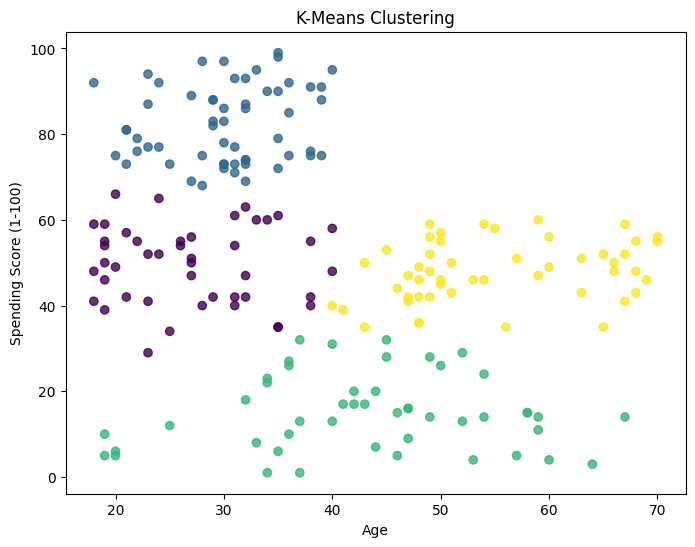

In [17]:
X2 = df[['Age', 'Spending Score (1-100)']].to_numpy()
centroids2, idx2 = kmeans(X2, 4, 10)
plot(X2, idx2,'Age', 'Spending Score (1-100)')

K-Means iteration 0/9, J = 514.1169795984157
K-Means iteration 1/9, J = 404.69441022970483
K-Means iteration 2/9, J = 247.4650342903863
K-Means iteration 3/9, J = 223.34011362678032
K-Means iteration 4/9, J = 222.44665932832598
K-Means iteration 5/9, J = 222.2723823983987
K-Means iteration 6/9, J = 222.2723823983987
K-Means iteration 7/9, J = 222.2723823983987
K-Means iteration 8/9, J = 222.2723823983987
K-Means iteration 9/9, J = 222.2723823983987


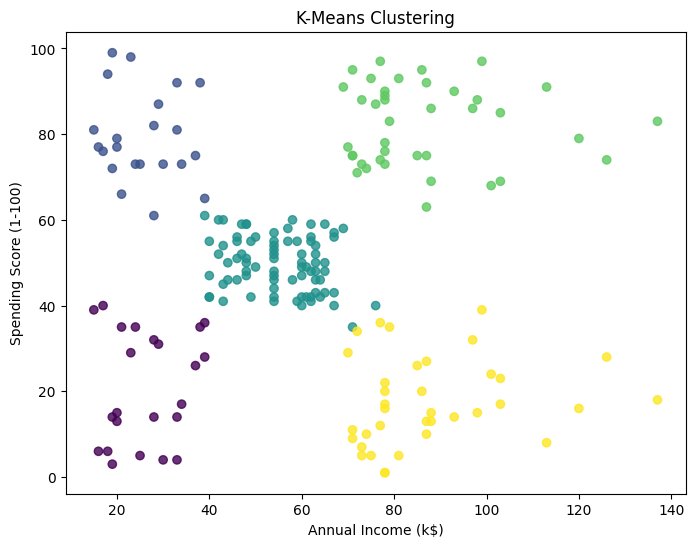

In [25]:
X3 = df[['Annual Income (k$)', 'Spending Score (1-100)']].to_numpy()
centroids3, idx3 = kmeans(X3, 5, 10)
plot(X3, idx3,'Annual Income (k$)', 'Spending Score (1-100)')

**3D Plot of Every Features**

K-Means iteration 0/9, J = 980.18525
K-Means iteration 1/9, J = 862.9088740544906
K-Means iteration 2/9, J = 843.3147757781799
K-Means iteration 3/9, J = 789.39678015318
K-Means iteration 4/9, J = 686.9308289063159
K-Means iteration 5/9, J = 613.4634482074753
K-Means iteration 6/9, J = 581.0577890781893
K-Means iteration 7/9, J = 558.5666449596029
K-Means iteration 8/9, J = 551.0339914192089
K-Means iteration 9/9, J = 549.9854436132138


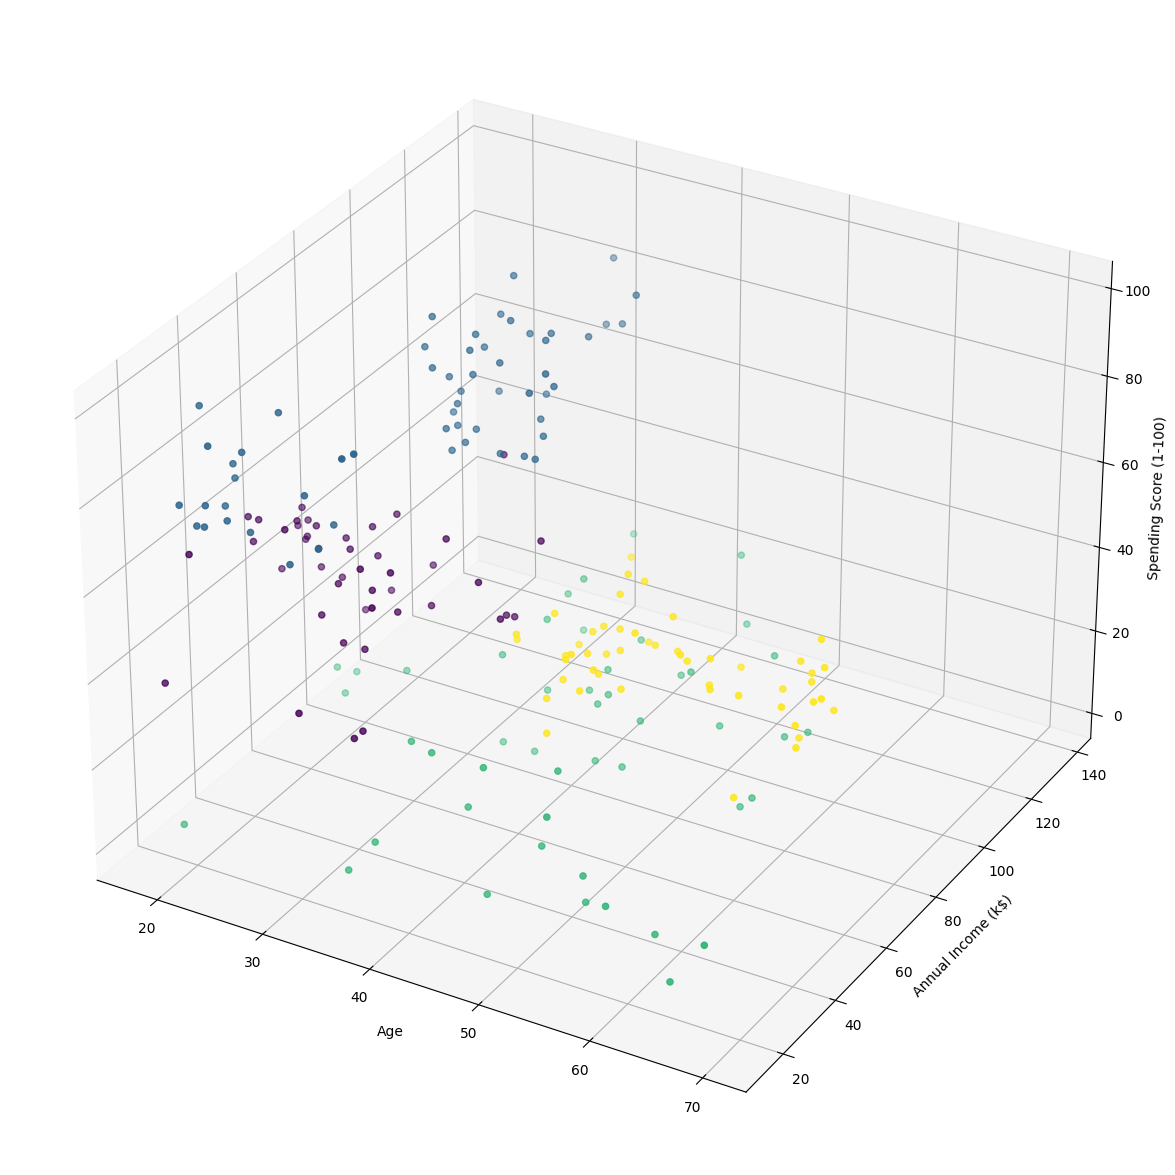

In [50]:
X4 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].to_numpy()
centroids4, idx4 = kmeans(X4, 4, 10)
plot3d(X4, idx2,'Age', 'Annual Income (k$)', 'Spending Score (1-100)')

**This Code is Written by Mushab Tinumbang** <br>
*Data Source: Kushal Mahindrakar*